In [1]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
from collections import defaultdict

In [2]:
# importing all following data and putting in a graph
pkl_file = open('Unfollower/15weeks_friend_dict.pkl', 'rb')
mydict2 = pickle.load(pkl_file)
pkl_file.close()

week = 0
for key, values in mydict2.items():
    if len(values[week]) == 0:
        mydict2[key] = []
        continue
    new = values[week][1]
    mydict2[key] = new

# mydict2 has format:
# user_id: [following_user_id1, following_user_id2...]

In [3]:
# forrest fire sampling implementation and use 
def forest_fire_sampling(graph_dict, initial_burn_probability, secondary_burn_probability, max_samples=None):
    # Choose a random start node
    random.seed(947)
    start_node = random.choice(list(graph_dict.keys()))
    
    # Force starting node to have at least 100 friends 
    if len(graph_dict[start_node]) < 100:
        start_node = random.choice(list(graph_dict.keys()))
    sampled_nodes = set([start_node])
    burning_nodes = set([start_node])
    
    while burning_nodes:
        new_burning_nodes = set()
        for node in burning_nodes:
            # For each neighbor, decide if it catches fire based on the burn probability
            for neighbor in graph_dict[node]:
                if neighbor not in sampled_nodes:
                    if random.random() < (initial_burn_probability if node == start_node else secondary_burn_probability):
                        new_burning_nodes.add(neighbor)
                        sampled_nodes.add(neighbor)
                        if max_samples and len(sampled_nodes) >= max_samples:
                            return sampled_nodes
        burning_nodes = new_burning_nodes

    return sampled_nodes

# sampling has undeterministic results where sample may have few nodes or many nodes depending on whether random starting node has many or few neighbors. We may want to force the starting node to have more than 10 friends. 

sample = forest_fire_sampling(mydict2, 0.2, 0.1, max_samples=1000)
shortened_dict = defaultdict(list)
print(len(mydict2))
for k in mydict2:
    if k in sample: 
        for v in mydict2[k]:
            if v in sample: 
                shortened_dict[k].append(v)

print(len(shortened_dict))

118640
963


1000


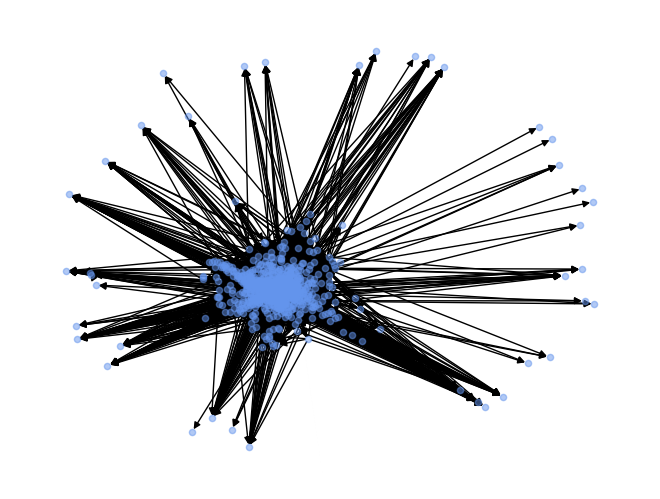

In [14]:
# Creating sample graph and drawing it 
subset_followers_graph = nx.Graph()
for k, v in shortened_dict.items():
    for neighbor in v:
        subset_followers_graph.add_edge(k, neighbor)

print(subset_followers_graph.number_of_nodes())

# Draw the graph
# node
nx.draw(subset_followers_graph, with_labels=False, node_size=20, node_color=(0.392, 0.584, 0.929, 0.5))

# Display the graph
plt.show()

In [12]:
# Creating graph from entire dataset 
full_followers_graph = nx.Graph()
for k, v in mydict2.items():
    for neighbor in v:
        full_followers_graph.add_edge(k, neighbor)

print(full_followers_graph.number_of_nodes())

KeyboardInterrupt: 

In [5]:
# clustering
partitions = nx.community.louvain_communities(subset_followers_graph)
for partition in partitions:
    print(len(partition))

272
367
59
205
97


717
